In [172]:
import numpy as np
import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import keras.backend as kb
from keras.optimizers import Adam
import pandas as pd

In [10]:
def CRPS(yTrue, yPred):
    yPred = kb.cumsum(yPred, axis=1)
    return kb.mean(kb.sum(kb.square(yPred - yTrue), axis=1)) / 199

In [11]:
class CNNGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size=32, imageDim=(100,200),
                 nChannels = 4, gsDim = 37, shuffle=True):
        'Initialization'
        self.imageDim = imageDim
        self.gsDim = gsDim
        self.nChannels = nChannels
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        Xim, yardage = self.__data_generation(list_IDs_temp)

        return Xim, yardage

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        Xim = np.empty((self.batch_size, *self.imageDim, self.nChannels))
        Xgs = np.empty((self.batch_size, self.gsDim))
        yardage = np.empty((self.batch_size,199), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            temp = np.load('data_fixed/files/image' + ID + '.npy')
            Xim[i,] = temp.astype('float')/128.
            
            # Store output
            yardage[i,] = np.load('data_fixed/files/yardage' + ID + '.npy')

        return Xim, yardage

class CombGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size=32, imageDim=(100,200),
                 nChannels = 4, gsDim = 37, shuffle=True):
        'Initialization'
        self.imageDim = imageDim
        self.gsDim = gsDim
        self.nChannels = nChannels
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        Xcombined, yardage = self.__data_generation(list_IDs_temp)

        return Xcombined, yardage

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        Xim = np.empty((self.batch_size, *self.imageDim, self.nChannels))
        Xgs = np.empty((self.batch_size, self.gsDim))
        yardage = np.empty((self.batch_size,199), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            temp = np.load('data_fixed/files/image' + ID + '.npy')
            Xim[i,] = temp.astype('float')/128.
            Xgs[i,] = np.load('data_fixed/files/gameState' + ID + '.npy')
            
            # Store output
            yardage[i,] = np.load('data_fixed/files/yardage' + ID + '.npy')

        return [Xgs,Xim], yardage
    
class CNNGeneratorOG(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size=64, imageDim=(100,200),
                 nChannels = 4, gsDim = 37, shuffle=False):
        'Initialization'
        self.imageDim = imageDim
        self.gsDim = gsDim
        self.nChannels = nChannels
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        Xim, yardage = self.__data_generation(list_IDs_temp)

        return Xim, yardage

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        Xim = np.empty((self.batch_size, *self.imageDim, self.nChannels))
        Xgs = np.empty((self.batch_size, self.gsDim))
        yardage = np.empty((self.batch_size,199), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            temp = np.load('data_fixed/og_files/image' + str(ID) + '.npy')
            Xim[i,] = temp.astype('float')/128.
            
            # Store output
            yardage[i,] = np.load('data_fixed/og_files/yardage' + str(ID) + '.npy')

        return Xim, yardage
    
class CombGeneratorOG(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size=64, imageDim=(100,200),
                 nChannels = 4, gsDim = 37, shuffle=False):
        'Initialization'
        self.imageDim = imageDim
        self.gsDim = gsDim
        self.nChannels = nChannels
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        Xcombined, yardage = self.__data_generation(list_IDs_temp)

        return Xcombined, yardage

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        Xim = np.empty((self.batch_size, *self.imageDim, self.nChannels))
        Xgs = np.empty((self.batch_size, self.gsDim))
        yardage = np.empty((self.batch_size,199), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            temp = np.load('data_fixed/og_files/image' + str(ID) + '.npy')
            Xim[i,] = temp.astype('float')/128.
            Xgs[i,] = np.load('data_fixed/og_files/gameState' + str(ID) + '.npy')
            
            # Store output
            yardage[i,] = np.load('data_fixed/og_files/yardage' + str(ID) + '.npy')

        return [Xgs,Xim], yardage

In [223]:
def qois(densMat):
    distMat = np.clip(np.cumsum(densMat, axis = 1),0,1)
    distPred = np.mean(distMat,axis = 0)
    densPred = np.mean(densMat,axis = 0)
    
    yards = np.arange(-99,100,1).reshape((199,1))
    muMat = densMat @ yards  
    s2Mat = (densMat @ yards ** 2) - muMat ** 2
    skewMat = ((densMat @ yards ** 3)-3*muMat*s2Mat-muMat ** 3)/(s2Mat ** 3/2)
    
    muMat = muMat.reshape(-1,)
    s2Mat = s2Mat.reshape(-1,)
    skewMat = skewMat.reshape(-1,)
    
    muPred = np.mean(muMat)
    s2Pred = np.mean(s2Mat)
    skewPred = np.mean(skewMat)
    
    return densMat, distMat, muMat, s2Mat, skewMat, densPred, distPred, muPred, s2Pred, skewPred

def vec_to_yards(v):
    y = 100-np.count_nonzero(v,1)
    return y
    
def fuck_batches(pids, model, name):
    n = len(pids)
    densMat = np.empty((n,199))
    for ii in tqdm_notebook(range(n)):
        if name == 'cnn':
            qwer = np.load('data_fixed/og_files/image' + str(pids[ii]) + '.npy')/128.
            densMat[ii,:] = model.predict(qwer.reshape((1,100,200,4)))
        elif name == 'combined':
            qwer = np.load('data_fixed/og_files/image' + str(pids[ii]) + '.npy')/128.
            zxcv = np.load('data_fixed/og_files/gameState' + str(pids[ii]) + '.npy')
            densMat[ii,:] = model.predict([zxcv.reshape((1,37)),qwer.reshape((1,100,200,4))])
    return densMat

def emp_CDF(pids):
    n = len(pids)
    distMat = np.empty((n,199))
    for ii in tqdm_notebook(range(n)):
        distMat[ii,:] = np.load('data_fixed/og_files/yardage'+str(pids[ii])+'.npy')
    CDF = np.mean(distMat,axis = 0)
    return CDF
        
def split_CDF(partition,split):
    ids = partition[split]
    n = len(ids)
    distMat = np.empty((n,199))
    for ii in tqdm_notebook(range(n)):
        distMat[ii,:] = np.load('data_fixed/files/yardage'+str(ids[ii])+'.npy')
    CDF = np.mean(distMat,axis = 0)
    return CDF

def best_rushers(rusherDict, model):
    n = len(rusherDict)
    out = np.empty((1,4),float)
    
    for ii, rusher in tqdm_notebook(zip(range(n),rusherDict)):
        playIds = rusherDict[rusher]
        
        if len(playIds) > 19:
        
            diff = 0
            yT = 0
            yP = 0
            yards = np.arange(-99,100,1).reshape((199,))
        
            for playId in playIds:
                im = np.load('data_fixed/og_files/image'+str(playId)+'.npy')/128.
                yTrue = np.load('data_fixed/og_files/yardage'+str(playId)+'.npy')
                yTrue = 100-np.count_nonzero(yTrue)
            
                yDens = model.predict(im.reshape((1,100,200,4)))
                yPred  = np.inner(yDens, yards)
                yPred = np.asscalar(yPred)
                
                yT += yTrue
                yP += yPred
                diff += yTrue-yPred
            
            diff = diff/len(playIds)
            yT = yT/len(playIds)
            yP = yP/len(playIds)
            
            vec = np.array([rusher, yT, yP, diff]).reshape((1,4))
            out = np.append(out,vec,axis = 0)
            
    out = np.delete(out,(0),axis = 0)
    return out

def player_lookup(playerid):
    a = train_df[train_df['NflId']==playerid]
    b = a[a['NflIdRusher']==playerid]
    c = b['DisplayName']
    return c

In [13]:
partition = np.load('data_fixed/partition_dict.npy',allow_pickle = True).item()
pids = np.load('data/playIds.npy',allow_pickle = True) #This stays the same
pids = list(pids)

json_file = open('cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn_model = model_from_json(loaded_model_json)
cnn_model.load_weights('cnn/fixed_weights/cnnBestWeights.h5')


json_file = open('mlp.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
mlp_model = model_from_json(loaded_model_json)
mlp_model.load_weights('mlp/weights/mlpBestWeights.h5')

json_file = open('combined.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
combined_model = model_from_json(loaded_model_json)
combined_model.load_weights('combined/fixed_weights/combinedBestWeights.h5')

## Densities for 2 plays

In [88]:
im1 = np.load('play1Image.npy')/128. #corresponds to playId 20170910000081
gs1 = np.load('play1GameState.npy')
y1 = np.load('play1Yardage.npy')

im2 = np.load('play2Image.npy')/128. #corresponds to playId 20170910001102
gs2 = np.load('play2GameState.npy')
y2 = np.load('play2Yardage.npy')

mlp_data = np.load('data/mlp_data.npy')
mlp1 = mlp_data[52,:]
mlp2 = mlp_data[63,:]

In [94]:
mlp1.shape

(81,)

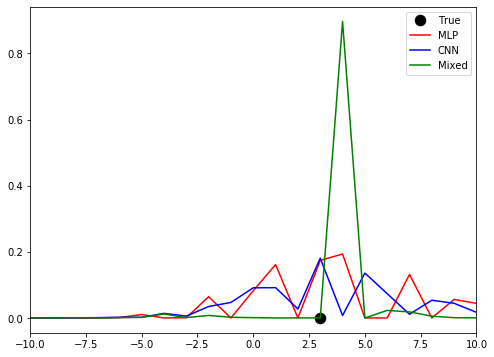

In [104]:
cnn_dens_1 = cnn_model.predict(im1.reshape((1,100,200,4)))
combined_dens_1 = combined_model.predict(
    [gs1.reshape((1,37)),im1.reshape((1,100,200,4))])
mlp_dens_1 = mlp_model.predict(mlp1.reshape(1,81))


plt.figure(figsize =(8,6))
plt.plot(199-np.count_nonzero(y1)-99,0,'ko',
         markersize = 10, markeredgewidth = 1.5)
plt.plot(np.arange(-99,100,1),mlp_dens_1.reshape((199,)),'r-')
plt.plot(np.arange(-99,100,1),cnn_dens_1.reshape((199,)),'b-')
plt.plot(np.arange(-99,100,1),combined_dens_1.reshape((199,)),'g-')

plt.xlim([-10,10])


plt.legend(['True','MLP','CNN','Mixed'])

plt.savefig('figs/play1.jpg', dpi = 500)
plt.show()

array([[0.4921875, 0.4921875, 0.4921875, ..., 0.4921875, 0.4921875,
        0.4921875],
       [0.4921875, 0.4921875, 0.4921875, ..., 0.4921875, 0.4921875,
        0.4921875],
       [0.4921875, 0.4921875, 0.4921875, ..., 0.4921875, 0.4921875,
        0.4921875],
       ...,
       [0.4921875, 0.4921875, 0.4921875, ..., 0.4921875, 0.4921875,
        0.4921875],
       [0.4921875, 0.4921875, 0.4921875, ..., 0.4921875, 0.4921875,
        0.4921875],
       [0.4921875, 0.4921875, 0.4921875, ..., 0.4921875, 0.4921875,
        0.4921875]])

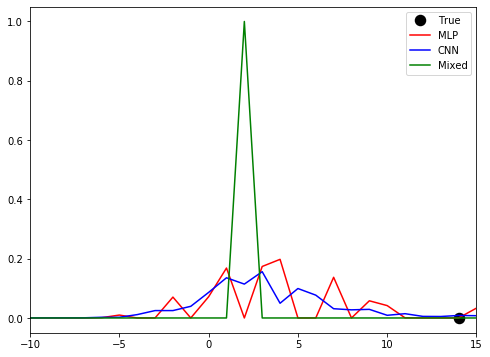

In [108]:
cnn_dens_2 = cnn_model.predict(im2.reshape((1,100,200,4)))
combined_dens_2 = combined_model.predict(
    [gs2.reshape((1,37)),im2.reshape((1,100,200,4))])
mlp_dens_2 = mlp_model.predict(mlp2.reshape(1,81))


plt.figure(figsize =(8,6))
plt.plot(199-np.count_nonzero(y2)-99,0,'ko',
         markersize = 10, markeredgewidth = 1.5)
plt.plot(np.arange(-99,100,1),mlp_dens_2.reshape((199,)),'r-')
plt.plot(np.arange(-99,100,1),cnn_dens_2.reshape((199,)),'b-')
plt.plot(np.arange(-99,100,1),combined_dens_2.reshape((199,)),'g-')

plt.xlim([-10,15])


plt.legend(['True','MLP','CNN','Mixed'])

plt.savefig('figs/play2.jpg', dpi = 500)
plt.show()

In [ ]:
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

In [ ]:
plt.plot(np.cumsum(dens1))
plt.xlim([90,110])
plt.show()
plt.plot(np.cumsum(dens2)-np.cumsum(dens1))
plt.xlim([90,110])
plt.show()

## Densities and distributions for entire dataset

In [55]:
densMat = fuck_batches(pids,cnn_model,'cnn')

In [56]:
ind = pids.index(20170910001102)
densMat[ind,:]

array([1.39282065e-07, 1.10488749e-07, 1.28918217e-07, 1.22212342e-07,
       7.96722759e-08, 1.32174421e-07, 8.88221265e-08, 8.66129426e-08,
       8.86871163e-08, 1.05657485e-07, 1.05154470e-07, 9.70951817e-08,
       8.28711890e-08, 1.15480120e-07, 9.89556597e-08, 7.56163629e-08,
       1.29315310e-07, 1.13619961e-07, 8.60322373e-08, 1.11596329e-07,
       1.11657442e-07, 7.57845768e-08, 6.34746797e-08, 9.55493960e-08,
       1.01692017e-07, 1.43396420e-07, 1.11102757e-07, 7.23396738e-08,
       1.10687346e-07, 9.05288218e-08, 1.03538220e-07, 1.04035195e-07,
       7.26570235e-08, 7.89872985e-08, 9.02828461e-08, 1.29217682e-07,
       7.96713664e-08, 9.55469375e-08, 9.07668110e-08, 8.56020748e-08,
       1.02528318e-07, 1.05942924e-07, 9.66244542e-08, 1.00915365e-07,
       8.83058959e-08, 7.73964146e-08, 8.87820661e-08, 1.16013496e-07,
       7.23238003e-08, 6.78145327e-08, 8.54225846e-08, 1.12469024e-07,
       8.97901486e-08, 6.09050161e-08, 8.92297365e-08, 9.48834327e-08,
      

In [57]:
pids[ind]

20170910001102

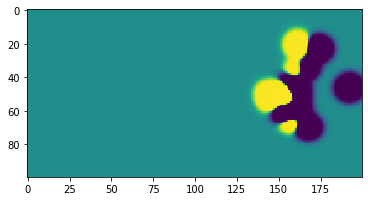

In [66]:
gs = np.load('data/og_files/gameState'+str(pids[ind])+'.npy')
im = np.load('data/og_files/image'+str(pids[ind])+'.npy')
dist = cnn_model.predict(im.reshape((1,100,200,4))/128.)
plt.imshow(im[:,:,3])

(100, 125)

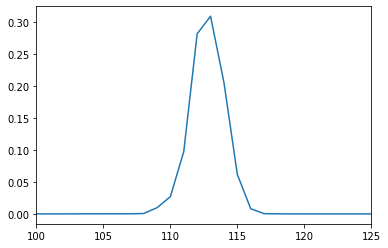

In [68]:
dist
plt.plot(dist.reshape(-1,))
plt.xlim([100,125])

In [61]:
densMat, distMat, muMat, s2Mat, skewMat, densPred, distPred, muPred, s2Pred, skewPred = qois(densMat)

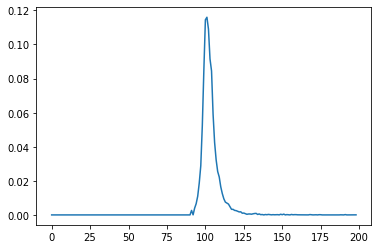

In [62]:
plt.plot(densPred)

In [70]:
print(np.sort(muMat))
print(np.argsort(muMat))

[-6.76152069 -6.64172487 -5.93146195 ... 92.00336429 92.01280759
 92.0144626 ]
[ 6536 10101 12810 ... 19568 20328  5136]


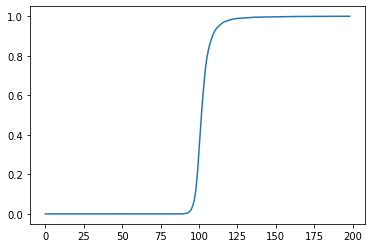

In [64]:
plt.plot(distPred)

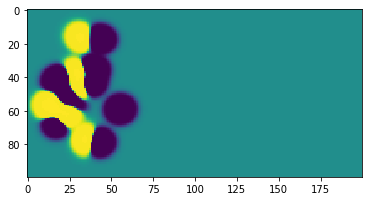

In [36]:
ii = 1000
im = np.load('data/og_files/image' + str(pids[ii]) + '.npy')
plt.imshow(im[:,:,3])

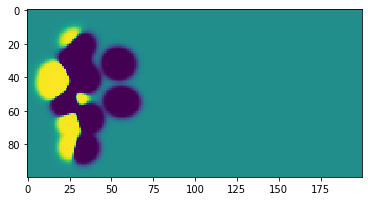

In [73]:
ind = 5136
gs = np.load('data/og_files/gameState'+str(pids[ind])+'.npy')
im = np.load('data/og_files/image'+str(pids[ind])+'.npy')
dist = cnn_model.predict(im.reshape((1,100,200,4))/128.)
plt.imshow(im[:,:,3])

In [72]:
asdf

20171029030426

In [77]:
mlp_score = np.load('mlp/mlp_test_score.npy')

In [78]:
mlp_score

array([0.01422244, 0.01423466])

In [113]:
generator = CombGenerator(partition['validation'], batch_size = 64)

combined_model.compile(loss=CRPS,optimizer = Adam())

combined_best = combined_model.evaluate_generator(generator,verbose = 1)

162/162 [==============================] - 58s 356ms/step


In [110]:
generator = CNNGenerator(partition['validation'],batch_size = 64)
cnn_model.compile(loss = CRPS, optimizer = Adam())
cnn_best = cnn_model.evaluate_generator(generator, verbose = 1)

162/162 [==============================] - 61s 379ms/step


In [114]:
combined_best

0.0057271141558885574

In [21]:
mlp_data = np.load('data/mlp_data.npy')

In [62]:
eCDF = emp_CDF(pids)
ePDF = np.diff(eCDF.reshape(-1,),n=1,prepend = 0)

gen_cnn = CNNGeneratorOG(pids,batch_size = 64)
cnn_dens = cnn_model.predict_generator(gen_cnn,verbose = 1)
_,_,_,_,_,cnnPDF,cnnCDF,_,_,_ = qois(cnn_dens)

gen_combined = CombGeneratorOG(pids,batch_size = 64)
combined_dens = combined_model.predict_generator(gen_combined,verbose = 1)
_,_,_,_,_,combinedPDF,combinedCDF,_,_,_ = qois(combined_dens)

mlp_dens = mlp_model.predict(mlp_data,verbose = 1)
_,_,_,_,_,mlpPDF,mlpCDF,_,_,_ = qois(mlp_dens)


 6752/23171 [=======>......................] - ETA: 0s

/Users/whpowell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/whpowell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


23171/23171 [==============================] - 1s 22us/step


/Users/whpowell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/whpowell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


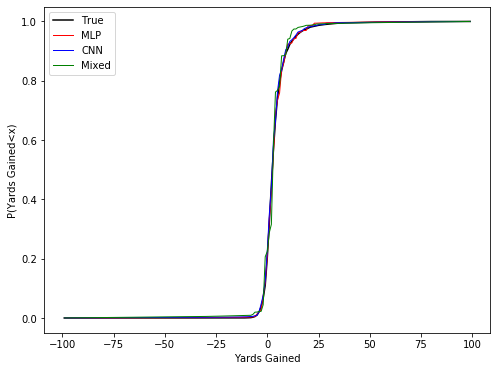

In [74]:
_,_,_,_,_,cnnPDF,cnnCDF,_,_,_ = qois(cnn_dens)
_,_,_,_,_,combinedPDF,combinedCDF,_,_,_ = qois(combined_dens)
_,_,_,_,_,mlpPDF,mlpCDF,_,_,_ = qois(mlp_dens)

x = np.arange(-99,100,1)

%matplotlib inline
plt.figure(figsize =(8,6))
plt.plot(x,eCDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,mlpCDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,cnnCDF.reshape(-1,),'b-',linewidth = 1.)
plt.plot(x,combinedCDF.reshape(-1,),'g-',linewidth = 1.)
plt.legend(['True','MLP','CNN','Mixed'],loc = 'best')
plt.xlabel('Yards Gained')
plt.ylabel('P(Yards Gained<x)')
plt.savefig('figs/dist1.jpg', dpi = 500)
plt.show()

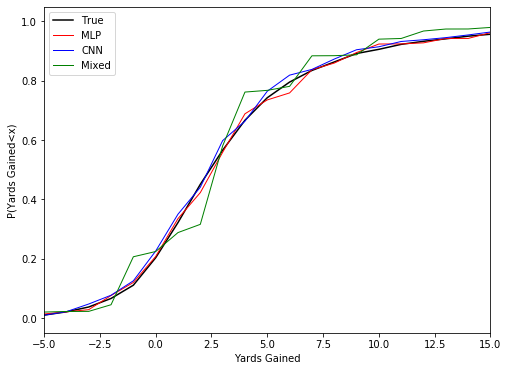

In [75]:
plt.figure(figsize =(8,6))
plt.plot(x,eCDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,mlpCDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,cnnCDF.reshape(-1,),'b-',linewidth = 1.)
plt.plot(x,combinedCDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlim([-5,15])
plt.xlabel('Yards Gained')
plt.ylabel('P(Yards Gained<x)')
plt.legend(['True','MLP','CNN','Mixed'],loc = 'best')
plt.savefig('figs/dist2.jpg', dpi = 500)
plt.show()

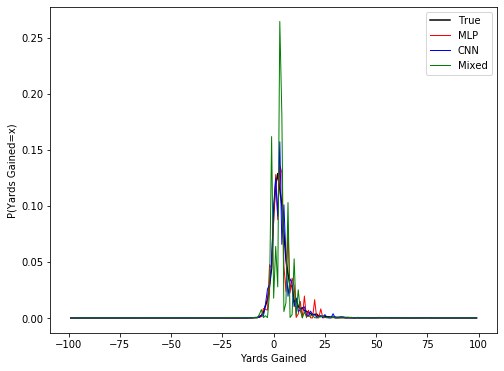

In [76]:
plt.figure(figsize =(8,6))
plt.plot(x,ePDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,mlpPDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,cnnPDF.reshape(-1,),'b-',linewidth = 1.)
plt.plot(x,combinedPDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlabel('Yards Gained')
plt.ylabel('P(Yards Gained=x)')
plt.legend(['True','MLP','CNN','Mixed'],loc = 'best')
plt.savefig('figs/dens1.jpg', dpi = 500)
plt.show()



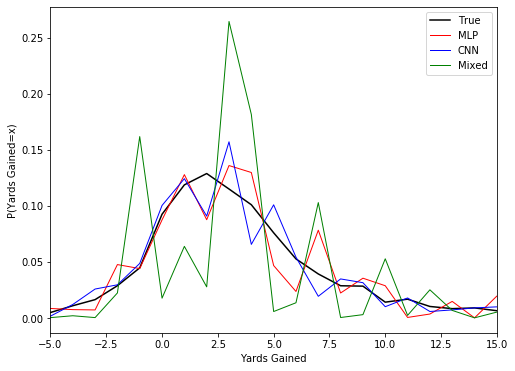

In [77]:
plt.figure(figsize =(8,6))
plt.plot(x,ePDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,mlpPDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,cnnPDF.reshape(-1,),'b-',linewidth = 1.)
plt.plot(x,combinedPDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlabel('Yards Gained')
plt.ylabel('P(Yards Gained=x)')
plt.xlim([-5,15])
plt.legend(['True','MLP','CNN','Mixed'],loc = 'best')
plt.savefig('figs/dens2.jpg', dpi = 500)
plt.show()

In [24]:
mlp_dens = mlp_model.predict(mlp_data,verbose = 1)

23171/23171 [==============================] - 1s 25us/step


In [25]:
_,_,_,_,_,cnnPDF,cnnCDF,_,_,_ = qois(cnn_dens)

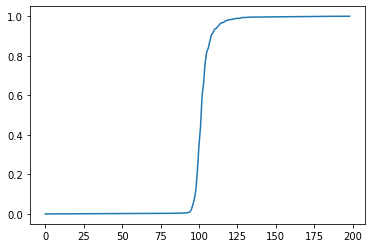

In [27]:
plt.plot(cnnCDF.reshape(199,))

In [53]:
cnn_score = np.load('cnn/fixed_cnn_test_score.npy')
print(cnn_score)

[0.01320305 0.01476256]


In [54]:
combined_model.compile(loss = CRPS, optimizer = Adam())
test_gen = CombGenerator(partition['test'],batch_size = 64)
combined_score = combined_model.evaluate_generator(test_gen,verbose = 1)
print(combined_score)

54/54 [==============================] - 15s 274ms/step
0.017554575577378273


In [55]:
mlp_score = np.load('mlp/mlp_test_score.npy')
print(mlp_score)

[0.01422244 0.01423466]


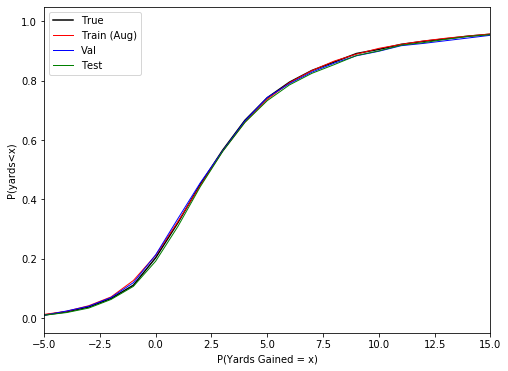

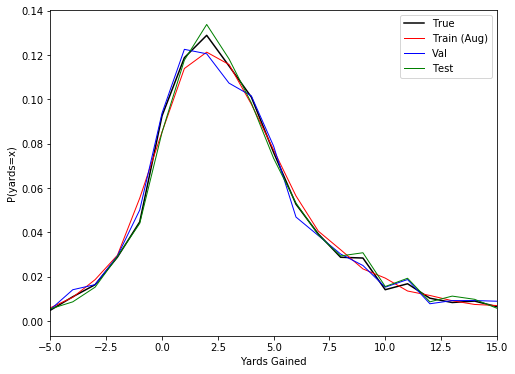

In [78]:
eCDF = emp_CDF(pids)
trainCDF = split_CDF(partition,'train')
valCDF = split_CDF(partition,'validation')
testCDF = split_CDF(partition,'test')

ePDF = np.diff(eCDF.reshape(-1,),n=1,prepend = 0)
trainPDF = np.diff(trainCDF.reshape(-1,),n=1,prepend = 0)
valPDF = np.diff(valCDF.reshape(-1,),n=1,prepend = 0)
testPDF = np.diff(testCDF.reshape(-1,),n=1,prepend = 0)

plt.figure(figsize =(8,6))
plt.plot(x,eCDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,trainCDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,valCDF.reshape(-1,),'b',linewidth = 1.)
plt.plot(x,testCDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlabel('P(Yards Gained = x)')
plt.ylabel('P(yards<x)')
plt.xlim([-5,15])
plt.legend(['True','Train (Aug)','Val','Test'],loc = 'best')
plt.savefig('figs/dens2.png', dpi = 1800)
plt.show()

plt.figure(figsize =(8,6))
plt.plot(x,ePDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,trainPDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,valPDF.reshape(-1,),'b',linewidth = 1.)
plt.plot(x,testPDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlabel('Yards Gained')
plt.ylabel('P(yards=x)')
plt.xlim([-5,15])
plt.legend(['True','Train (Aug)','Val','Test'],loc = 'best')
plt.savefig('figs/split_dens.jpg', dpi = 500)
plt.show()

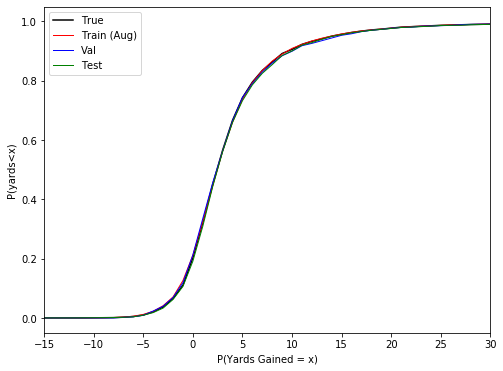

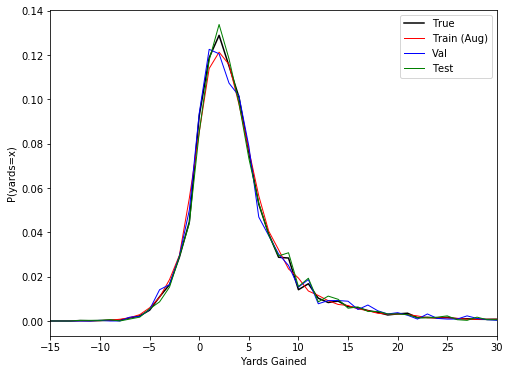

In [79]:
plt.figure(figsize =(8,6))
plt.plot(x,eCDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,trainCDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,valCDF.reshape(-1,),'b',linewidth = 1.)
plt.plot(x,testCDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlabel('P(Yards Gained = x)')
plt.ylabel('P(yards<x)')
plt.xlim([-15,30])
plt.legend(['True','Train (Aug)','Val','Test'],loc = 'best')
plt.savefig('figs/dens2.png', dpi = 1800)
plt.show()

plt.figure(figsize =(8,6))
plt.plot(x,ePDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,trainPDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,valPDF.reshape(-1,),'b',linewidth = 1.)
plt.plot(x,testPDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlabel('Yards Gained')
plt.ylabel('P(yards=x)')
plt.xlim([-15,30])
plt.legend(['True','Train (Aug)','Val','Test'],loc = 'best')
plt.savefig('figs/dens2.png', dpi = 1800)
plt.show()

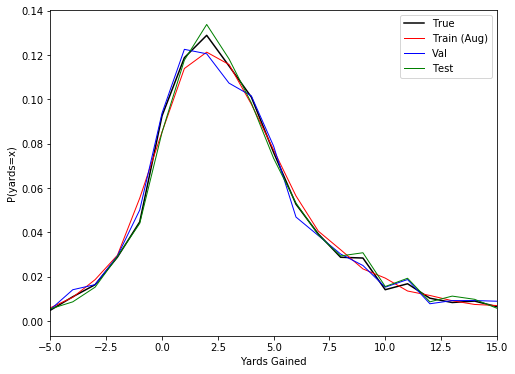

In [80]:
plt.figure(figsize =(8,6))
plt.plot(x,ePDF.reshape(-1,), '-k',linewidth = 1.5)
plt.plot(x,trainPDF.reshape(-1,),'r-',linewidth = 1.)
plt.plot(x,valPDF.reshape(-1,),'b',linewidth = 1.)
plt.plot(x,testPDF.reshape(-1,),'g-',linewidth = 1.)
plt.xlabel('Yards Gained')
plt.ylabel('P(yards=x)')
plt.xlim([-5,15])
plt.legend(['True','Train (Aug)','Val','Test'],loc = 'best')
plt.savefig('figs/split_dens.jpg', dpi = 500)
plt.show()

In [224]:
rusherDict = np.load('data/rusherDict.npy',allow_pickle = True).item()
rushMat = best_rushers(rusherDict,cnn_model)
rushMat = rushMat[rushMat[:,3].argsort()]

In [225]:
rushMat

array([[ 2.56077000e+06,  1.91304348e+00,  4.03273012e+00,
        -2.11968664e+00],
       [ 2.62000000e+02,  2.53333333e+00,  4.23642062e+00,
        -1.70308729e+00],
       [ 2.55546000e+06,  2.19512195e+00,  3.66186858e+00,
        -1.46674663e+00],
       [ 2.53921700e+06,  2.75000000e+00,  3.97943206e+00,
        -1.22943206e+00],
       [ 2.55065800e+06,  2.45454545e+00,  3.54609118e+00,
        -1.09154572e+00],
       [ 2.56113700e+06,  2.97368421e+00,  3.87447900e+00,
        -9.00794793e-01],
       [ 2.54016800e+06,  2.58208955e+00,  3.43168518e+00,
        -8.49595632e-01],
       [ 2.53346000e+06,  2.33333333e+00,  3.16135644e+00,
        -8.28023105e-01],
       [ 2.55373300e+06,  2.70689655e+00,  3.51162999e+00,
        -8.04733439e-01],
       [ 2.55546400e+06,  3.01162791e+00,  3.77090256e+00,
        -7.59274651e-01],
       [ 2.53589000e+06,  2.96875000e+00,  3.69461184e+00,
        -7.25861835e-01],
       [ 2.49547300e+06,  3.64444444e+00,  4.23793745e+00,
      

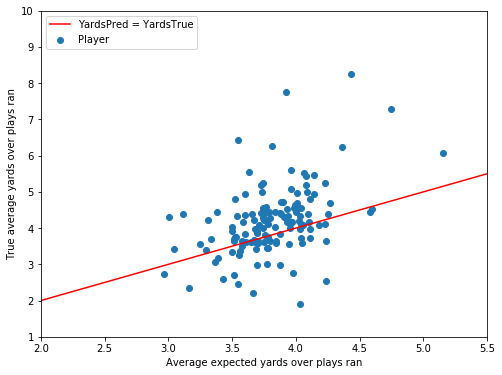

In [265]:
plt.figure(figsize =(8,6))
plt.scatter(rushMat[:,2],rushMat[:,1])
plt.plot(np.linspace(-10,40,1000),np.linspace(-10,40,1000),'-r',linewidth = 1.5)
plt.xlim([2,5.5])
plt.ylim([1,10])
plt.legend(['YardsPred = YardsTrue','Player'],loc = 'upper left')
plt.xlabel('Average expected yards over plays ran')
plt.ylabel('True average yards over plays ran')
plt.savefig('figs/scatter.jpg', dpi = 500)
plt.show()

In [227]:
out = np.empty((1,4),float)
out = np.append(out,np.ones((1,4)),0)

In [228]:
out

array([[ 54.  ,  36.  , 388.8 , 253.44],
       [  1.  ,   1.  ,   1.  ,   1.  ]])

In [229]:
train_df = pd.read_csv('data/train.csv', low_memory=False)

In [230]:
player_lookup(2558066)

34649     Curtis Samuel
78165     Curtis Samuel
117468    Curtis Samuel
123331    Curtis Samuel
359864    Curtis Samuel
380861    Curtis Samuel
421936    Curtis Samuel
441438    Curtis Samuel
478387    Curtis Samuel
478541    Curtis Samuel
Name: DisplayName, dtype: object

In [231]:
rushMat.shape

(135, 4)

In [232]:
print(rushMat)

[[ 2.56077000e+06  1.91304348e+00  4.03273012e+00 -2.11968664e+00]
 [ 2.62000000e+02  2.53333333e+00  4.23642062e+00 -1.70308729e+00]
 [ 2.55546000e+06  2.19512195e+00  3.66186858e+00 -1.46674663e+00]
 [ 2.53921700e+06  2.75000000e+00  3.97943206e+00 -1.22943206e+00]
 [ 2.55065800e+06  2.45454545e+00  3.54609118e+00 -1.09154572e+00]
 [ 2.56113700e+06  2.97368421e+00  3.87447900e+00 -9.00794793e-01]
 [ 2.54016800e+06  2.58208955e+00  3.43168518e+00 -8.49595632e-01]
 [ 2.53346000e+06  2.33333333e+00  3.16135644e+00 -8.28023105e-01]
 [ 2.55373300e+06  2.70689655e+00  3.51162999e+00 -8.04733439e-01]
 [ 2.55546400e+06  3.01162791e+00  3.77090256e+00 -7.59274651e-01]
 [ 2.53589000e+06  2.96875000e+00  3.69461184e+00 -7.25861835e-01]
 [ 2.49547300e+06  3.64444444e+00  4.23793745e+00 -5.93493006e-01]
 [ 2.56074200e+06  3.57831325e+00  4.05003412e+00 -4.71720867e-01]
 [ 2.55026800e+06  3.55000000e+00  3.94895669e+00 -3.98956688e-01]
 [ 2.55820400e+06  3.72262774e+00  4.11164085e+00 -3.89013111e

In [244]:
player_lookup(2550658)

14110     Branden Oliver
14129     Branden Oliver
14154     Branden Oliver
14174     Branden Oliver
23976     Branden Oliver
23999     Branden Oliver
24351     Branden Oliver
44127     Branden Oliver
44150     Branden Oliver
44304     Branden Oliver
44656     Branden Oliver
44677     Branden Oliver
44700     Branden Oliver
44722     Branden Oliver
44788     Branden Oliver
59154     Branden Oliver
59551     Branden Oliver
112888    Branden Oliver
112910    Branden Oliver
236902    Branden Oliver
237012    Branden Oliver
237584    Branden Oliver
237606    Branden Oliver
237628    Branden Oliver
237650    Branden Oliver
237672    Branden Oliver
259178    Branden Oliver
259222    Branden Oliver
259398    Branden Oliver
259420    Branden Oliver
259573    Branden Oliver
259859    Branden Oliver
259881    Branden Oliver
Name: DisplayName, dtype: object

In [267]:
asdf = np.load('combined/fixed_comb_test_score.npy')

In [268]:
asdf

array([0.0100216 , 0.01430236])